In [1]:
from dl import authClient as ac, queryClient as qc, storeClient as sc, helpers
import pylab as plt
import numpy as np
import matplotlib as mpl

In [2]:
token=ac.login('mgkadrmas')

In [3]:
ra=13
dec=-73
rad=0.5

In [4]:
res=qc.query(token,sql='select * from gaia_dr2.gaia_source where q3c_radial_query(ra,dec,'+str(ra)+','+str(dec)+','+str(rad)+')')
df=helpers.utils.convert(res,'table')

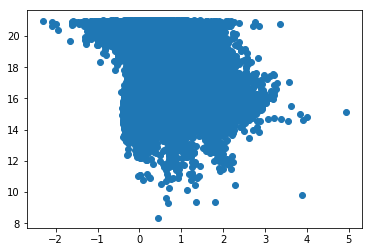

In [5]:
plt.scatter(df['bp_rp'].data,df['phot_g_mean_mag'])

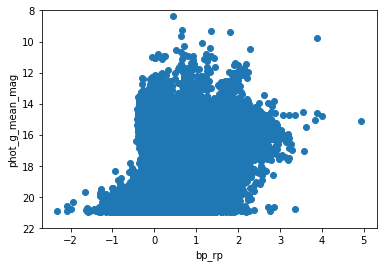

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('bp_rp')
ax.set_ylabel('phot_g_mean_mag')
ax.set_ylim([22,8])
sc = ax.scatter(df['bp_rp'],df['phot_g_mean_mag'])

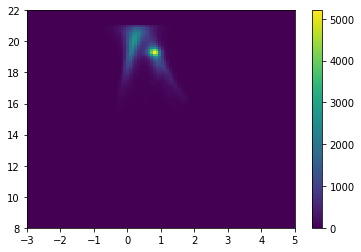

In [7]:
plt.hist2d(df['bp_rp'], df['phot_g_mean_mag'], [100,100], [[-3,5], [8,22]])
plt.colorbar()

In [8]:
print(df['bp_rp'])

   bp_rp   
-----------
        nan
        nan
 0.72878456
 0.14329338
 0.14804459
 0.09104729
        nan
0.044418335
        nan
0.108400345
        ...
 0.14712906
 0.04670143
 0.21453667
        nan
  0.1778717
        nan
        nan
        nan
0.060041428
 0.60993576
 0.39370918
Length = 660185 rows


In [9]:
print(df['phot_g_mean_mag'])

phot_g_mean_mag
---------------
      20.590502
       20.51998
      20.805826
      19.675932
       18.62181
      19.243717
      20.784012
      20.665087
      19.781532
      19.958853
            ...
      20.000633
      19.775084
      18.879673
      20.308287
      18.041273
      20.527155
      20.385025
      19.789137
      19.373842
       19.42886
      20.441027
Length = 660185 rows


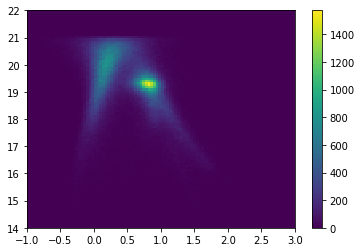

In [10]:
plt.hist2d(df['bp_rp'], df['phot_g_mean_mag'], [100,100], [[-1,3], [14,22]])
plt.colorbar()

In [11]:
x=np.arange(-1,3,0.01)
y=-3*x+20
u=np.arange(-1,3,0.01)
v=-4.75*u+25
m=np.arange(-1,3,0.01)
n=20*m+10

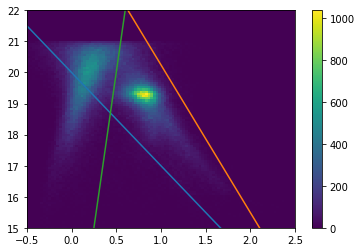

In [12]:
plt.hist2d(df['bp_rp'], df['phot_g_mean_mag'], [100,100], [[-.5,2.5], [15,22]])
#plt.ylim(22,15)
plt.colorbar()
plt.plot(x,y)
plt.plot(u,v)
plt.plot(m,n)

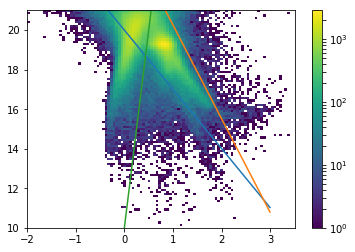

In [13]:
plt.hist2d(df['bp_rp'], df['phot_g_mean_mag'], [100,100], [[-2,3.5], [10,21]], norm=mpl.colors.LogNorm())
#plt.ylim(21,10)
plt.colorbar()
plt.plot(x,y)
plt.plot(u,v)
plt.plot(m,n)

In [17]:
#good1 = (df['phot_g_mean_mag']>=15.5) & (df['phot_g_mean_mag']<=-4.75*df['bp_rp']+25.75) & (df['phot_g_mean_mag']>=-3*df['bp_rp']+20) & (df['phot_g_mean_mag']<=20*df['bp_rp']+10) & (df['phot_g_mean_mag']<=21)
good1 = ((df['phot_g_mean_mag']>=16) & (df['phot_g_mean_mag']<=-4.75*df['bp_rp']+25) & (df['phot_g_mean_mag']>=-3*df['bp_rp']+20) & (df['phot_g_mean_mag']<=20*df['bp_rp']+10) & (df['phot_g_mean_mag']<=21) & (np.abs(df['parallax'])<=0.2))

####check value of parallax limit (i used the same value as for the LMC)


/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)


In [18]:
np.sum(good1)

65223

In [19]:
medpmra=np.median(df['pmra'][good1])
medpmdec=np.median(df['pmdec'][good1])
print(medpmra)
print(medpmdec)

0.664527105049144
-1.20297335649227


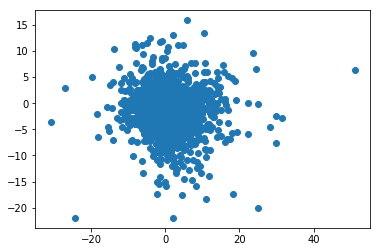

In [20]:
plt.scatter(df['pmra'][good1], df['pmdec'][good1])

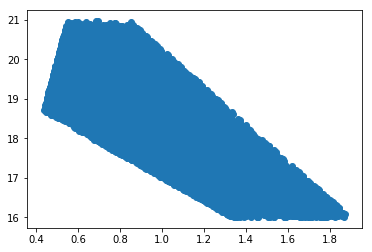

In [21]:
plt.scatter(df['bp_rp'][good1], df['phot_g_mean_mag'][good1])

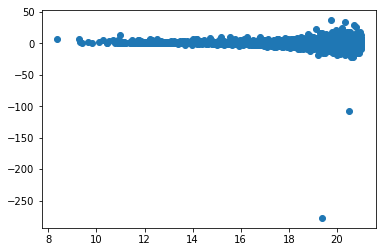

In [22]:
plt.scatter(df['phot_g_mean_mag'], df['parallax'])

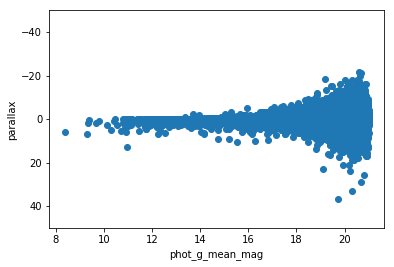

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('phot_g_mean_mag')
ax.set_ylabel('parallax')
ax.set_ylim([50,-50])
sc = ax.scatter(df['phot_g_mean_mag'],df['parallax'])

In [32]:
pndist=np.sqrt((df['pmra']-medpmra)**2 + (df['pmdec']-medpmdec)**2)

In [33]:
print (pndist)

        pmra       
-------------------
                nan
                nan
                nan
 2.8352107546292338
0.43541963486624113
 0.6160707529140383
 3.6637327794806245
  1.709081974825874
 1.4828264605180417
 1.5920686961546668
                ...
 2.4015214641565517
 1.6950766164188866
 1.4107779986395441
 0.5374570680506565
 0.1792492437039274
                nan
                nan
                nan
  4.920154279739348
 17.367686349133564
 2.4663798615554855
Length = 660185 rows


In [24]:
good2= good1 = ((df['phot_g_mean_mag']>=16) & (df['phot_g_mean_mag']<=-4.75*df['bp_rp']+25) & (df['phot_g_mean_mag']>=-3*df['bp_rp']+20) & (df['phot_g_mean_mag']<=20*df['bp_rp']+10) & (df['phot_g_mean_mag']<=21) & (np.abs(df['parallax'])<=0.2) & (pndist<=2.0))

####check value pndist limit


/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)


In [25]:
np.sum(good2)

57940

In [27]:
import math

In [28]:
medplx=np.median(df['parallax'][good2])+0.030112982075019102 #right offset for correct distance 
ngood=np.sum(good2)
SE= (1/ngood)*math.sqrt(sum((medplx-(df['parallax'][good2]))**2))

In [29]:
dist=1/medplx
print(dist)

34.67940889197737
